In [5]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import yaml
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def pretty_print_json(json_obj):
    print(json.dumps(json_obj, sort_keys=True, indent=4, separators=(',', ': ')))

In [7]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler('hOciiruVxWd088bbtRxMYrfJx', 'zbFVeZ8mrFCpJWGOcaRtCCQ0PkBSq03OubjDjXMxOhGTeFc1XB')
auth.set_access_token('82749582-TH2Gm9qKRYdvYcKxtyEQdHK5Fb91LVyJTTV9aLrVg', 'IpzMLjHlfJBww0TfBVUUr5UeJedCPaFZdk6nt631vOlG2')
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Targets: BBC, CBS, CNN, Fox, and New York times
target_news = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Array to hold sentiment
sentiments = []

In [10]:
# test for debug
# public_tweets = api.user_timeline("@CNN")
# pretty_print_json(public_tweets)

In [11]:
# Loop through all 5 media news accounts
for target_user in target_news:
    counter = 1
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)
        for tweet in public_tweets:
            # run vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweet_text = tweet["text"]

            # include sentiments for each tweet into an array
            sentiments.append({ "Tweets Ago": counter,
                                     "Media": tweet["user"]["screen_name"],
                                      "Date": tweet["created_at"], 
                                     "Tweet": tweet_text,
                                  "Compound": compound,
                                  "Positive": pos,
                                  "Negative": neu,
                                   "Neutral": neg })

            # Add to counter 
            counter = counter + 1

In [12]:
#convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["Tweets Ago","Media","Tweet","Date","Compound","Positive","Negative","Neutral"]]
sentiments_pd.head()

,Tweets Ago,Media,Tweet,Date,Compound,Positive,Negative,Neutral
0,1,BBC,✊ What makes a hero? https://t.co/ZrMGLQQkdn h...,Mon Jan 22 09:00:38 +0000 2018,0.5574,0.474,0.526,0.000
1,2,BBC,RT @bbcgetinspired: If you're afraid of height...,Mon Jan 22 08:51:42 +0000 2018,0.5792,0.178,0.753,0.069
2,3,BBC,RT @TWBBC: Watch @ProfBrianCox and @ericschmid...,Mon Jan 22 08:46:59 +0000 2018,0.4767,0.154,0.846,0.000
3,4,BBC,RT @bbcpress: A rising cello star uncovers lon...,Mon Jan 22 08:46:24 +0000 2018,0.4404,0.132,0.868,0.000
4,5,BBC,RT @CBeebiesHQ: 🚨BLOOPER ALERT!🚨\n\nAt least i...,Mon Jan 22 08:46:20 +0000 2018,0.1511,0.067,0.933,0.000


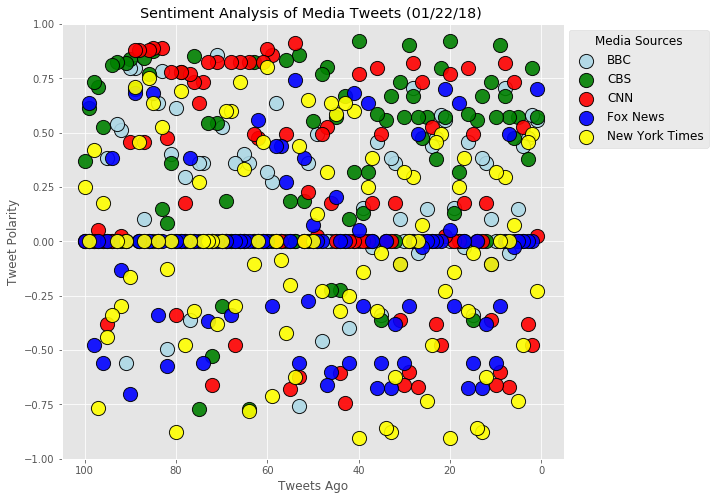

In [13]:
# Plot 1

plt.style.use('ggplot')
fig = plt.figure(figsize=(9,8))
colors = ['lightblue', 'green', 'red', 'blue','yellow']

bbc_df = sentiments_pd[sentiments_pd["Media"] == "BBC"]
cbs_df = sentiments_pd[sentiments_pd["Media"] == "CBS"]
cnn_df = sentiments_pd[sentiments_pd["Media"] == "CNN"]
fox_df = sentiments_pd[sentiments_pd["Media"] == "FoxNews"]
nyt_df = sentiments_pd[sentiments_pd["Media"] == "nytimes"]

# Plot Graph
bbc = plt.scatter(bbc_df["Tweets Ago"],bbc_df["Compound"],s=200, c=colors[0], alpha=0.9, linewidths=1, edgecolor='black')
cbs = plt.scatter(cbs_df["Tweets Ago"],cbs_df["Compound"],s=200, c=colors[1], alpha=0.9, linewidths=1, edgecolor='black')
cnn = plt.scatter(cnn_df["Tweets Ago"],cnn_df["Compound"],s=200, c=colors[2], alpha=0.9, linewidths=1, edgecolor='black')
fox = plt.scatter(fox_df["Tweets Ago"],fox_df["Compound"],s=200, c=colors[3], alpha=0.9, linewidths=1, edgecolor='black')
nyt = plt.scatter(nyt_df["Tweets Ago"],nyt_df["Compound"],s=200, c=colors[4], alpha=0.9, linewidths=1, edgecolor='black')

# # Incorporate the other graph properties
legend = plt.legend((bbc,cbs,cnn,fox,nyt),("BBC","CBS","CNN","Fox News","New York Times"),fontsize="12", mode="Expanded",
           bbox_to_anchor=(1.3,1), loc="upper right", title="Media Sources", labelspacing=0.5, numpoints=1, scatterpoints=1)
legend.get_title().set_fontsize('12') 
plt.xlim(105,-5)
plt.ylim(-1,1)

plt.title("Sentiment Analysis of Media Tweets (%s) " % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Media_Tweet_Sentiments.png")
plt.show()

In [14]:
# Export into a CSV file
sentiments_pd.to_csv("Media_Tweeter_Sentiment_Analysis.csv",encoding='utf-8')

In [15]:
# Group data by media
sentments_group = sentiments_pd.groupby("Media")["Compound"].mean()
sentments_group.head()

Media
BBC        0.160425
CBS        0.349329
CNN        0.192827
FoxNews   -0.038026
nytimes   -0.018640
Name: Compound, dtype: float64

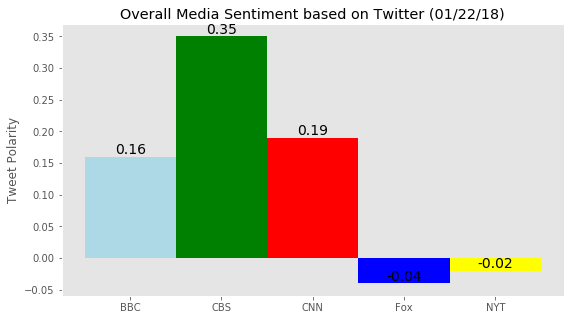

In [16]:
# Set values for X, Y axis and bar width
x = ["BBC","CBS","CNN","Fox","NYT"]
y = sentments_group.round(2)
bar_width = 1

# Plot Bar Chart 
fig = plt.figure(figsize=(9,5))
bars = plt.bar(x, y, bar_width, color=colors, lw=1)

# Set Graph Properties
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment based on Twitter (%s)' % (time.strftime("%x"))) 
plt.grid(False)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                '%s' % (str(float(height))),
                ha='center', va='bottom', color="black", fontsize="14")
plt.savefig("MediaTwitter_BarGraph.png")
plt.show()